# Lecture 13 Dimension Reduction: Principal Component Analysis

Starting from this lecture, we are goting to talk about **unsupervised machine learning**. The fundamental difference with supervised learning is that in unsupervised learning problems, there is no label (response) $y$ to be predicted. All we have is the data matrix $X\in\mathbb{R}^{n\times p}$, and the general task is to explore the "pattern" of data.

**Important Remark: For simplicity, below we assume that all variables (features) of $X$ has mean zero. For arbitrary $X$, we can pre-process it by substracting the mean of each variable for the corresponding column.**

One classical type of problem in unsupervised learning is **Dimension Reduction** (another type of problem is clustering).

**(unrigorous) Mathematical Description**: Given high-dimensional data observation $\mathbf{x}\in\mathbb{R}^{1\times p}$ (imagine it as one sample), find a "reasonable" projection function $$\mathbf{t}=\mathbf{h}(\mathbf{x}): \mathbb{R}^{1\times p}\to\mathbb{R}^{1\times k},k<<p$$ that "preserves" the high-dimensional information.

- A naive solution is to randomly pick $k$ component of $\mathbf{x}$-- of course there is huge waste of information.
- Another simple yet reasonable assumption is that $\mathbf{h}$ is linear transformation -- of course, the linear coefficients should depend on the "structure" of dataset. In other words, the "new coordinates" are the linear combination of "old coordinates". $$\mathbf{t}=\mathbf{h}(\mathbf{x})=\mathbf{x}\mathbf{V}_{k}, \mathbf{V}_{k}\in\mathbb{R}^{p\times k}.$$ In data matrix form (n samples), we have $$\mathbf{T}_{k}=\mathbf{X}\mathbf{V}_{k}\in\mathbb{R}^{n\times k}$$

Principal Component Analysis (PCA) is one typical linear dimension reduction method. Write $\mathbf{V}_{k}= [\mathbf{v}_1 \mathbf{v}_2 \cdots \mathbf{v}_k]$, then the column vectors $\mathbf{v}_j (1\leq j\leq k)$ are called the first k **Principal Components (PCs)** of the dataset, and $T_{k}$ is called the score matrix -- each row represents the $k$ scores of one sample in $k$ PCs -- they are the representation of the sample in $R^{k}$ space.

Now the central question becomes: how to find the PCs based on the dataset?

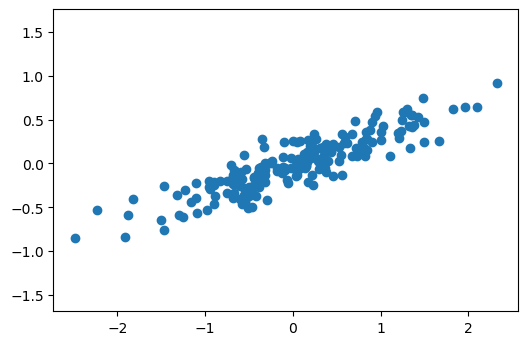

In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.RandomState(1)
X = np.matmul(rng.rand(2, 2), rng.randn(2, 200)).T
fig = plt.figure(dpi=100)
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

The data is in 2D space. If I "force" you to believe that the data can be further reduced to one-dimension , you may (reluctantly) admit that data is generated along one line (the long axis of "ellipse" sketched by the data), and the other short axis merely corresponds "noise".

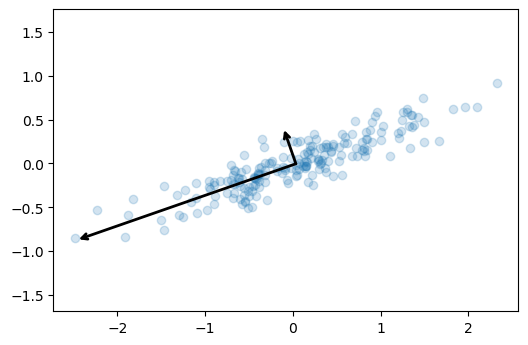

In [2]:
from sklearn.decomposition import PCA
# run pca from sklearn
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
fig = plt.figure(dpi=100)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Therefore we may imagine the major "axis" of ellipse are the principal components of the data, and the reduced coordinate are the projections on such direction. 

How do we determine the direction of "ellipse axis"? A staightfoward way is from **covariance matrix** of the data (to fully understand this, you need some knowledge about quadratic forms in linear algebra and multivariate Gaussian distribution in probability, although it's optional for the basic requirements).

## PCA from [Covariance Matrix](https://en.wikipedia.org/wiki/Covariance)

- **Step 0**: Center the data matrix, making it column mean zero.


- **Step 1**: Calculate the covariance matrix $$\Sigma =\frac{1}{n-1} X^{\top}X\in\mathbb{R}^{p\times p}.$$ The element $\Sigma_{ij}$ denotes the covariance between variable (feature) $i$ and $j$ in the data.


- **Step 2**: Eigen-decomposition of symmetrix covariance matrix $\Sigma$, $$\Sigma = V\Lambda V^{\top},$$ where $V\in \mathbb{R}^{p\times p}$ is orthogonal matrix whose columns are unit eigen-vectors and $\Lambda$ is the diagonal matrix of eigen-values. We further arrange the $\lambda_{j}$ in descending orders.


- **Step 3**: Principal Components are just the first $k$ columns of $V$, denoting as $V_{k}$. Indeed, they are the eigen-vectors corresponding to the top k eigen-values.


- **Step 4**: Compute the score matrix $$T_k = XV_k.$$ Then each row of $T_{k}$ is the coordinate of the sample in $\mathbb{R}^{k}$ space.


*(Optional) Remark*: The covariance matrix of $T_{k}$ is $\frac{1}{n-1} T^{\top}_{k}T_{k} = V_{k}^{\top}\Sigma V_{k}=\Lambda_{k}$, which is defined as the (1:k,1:k) submatrix of $\Lambda$. This means that different PCs are independent from each other, and $\lambda_{j}$ is indeed the variance of $j$-th PC.

In [3]:
import numpy as np

class myPCA():
    '"write your document strings here"'
    
    def __init__(self, n_components = 2):
        '"write your document strings here"'
        self.n_c = n_components
    
    
    def fit(self,X):
        '"write your document strings here"'
        cov_mat = np.cov(X.T) # covariance matrix, the input matrix to this function does not need to be centered
        eig_val, eig_vec = np.linalg.eigh(cov_mat) #eigen-values and orthogonal eigen-vectors --ascending order
        eig_val = np.flip(eig_val) # reverse the order --descending
        eig_vec = np.flip(eig_vec,axis=1) # reverse the order
        self.eig_values = eig_val[:self.n_c] # select the top eigen-vals
        self.principle_components = eig_vec[:,:self.n_c] # select the top eigen-vecs
        self.variance_ratio = self.eig_values/eig_val.sum() # variance explained by each PC
    
    def transform(self,X):
        '"write your document strings here"'
        return np.matmul(X-X.mean(axis = 0),self.principle_components) #project the data (centered) on PCs

In [4]:
from sklearn.datasets import load_digits
X,y = load_digits(return_X_y = True)

In [5]:
pca = myPCA(n_components = 15)
pca.fit(X)
X_pca = pca.transform(X)

In [6]:
X_pca.shape

(1797, 15)

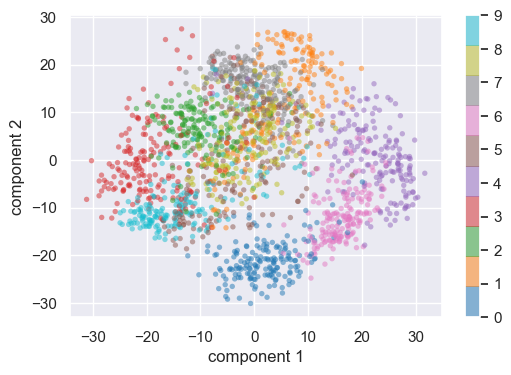

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
figure = plt.figure(dpi=100)
plt.scatter(X_pca[:, 0], X_pca[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

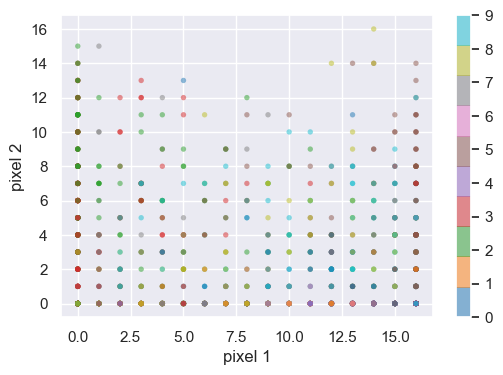

In [8]:
from numpy import random
figure = plt.figure(dpi=100)
rand_ind = random.randint(64, size=(2)) # pick up two random pixels from original data
plt.scatter(X[:, rand_ind[0]], X[:, rand_ind[1]],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('pixel 1')
plt.ylabel('pixel 2')
plt.colorbar();

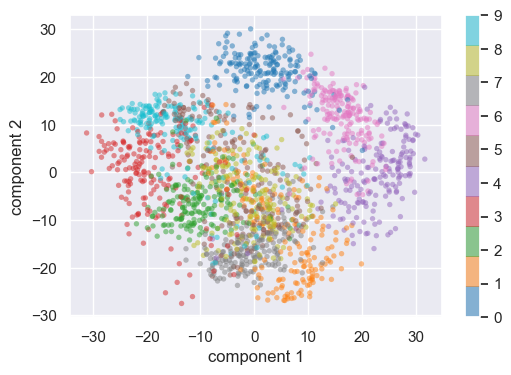

In [9]:
from sklearn.decomposition import PCA
pca_sklearn = PCA(n_components=2)
projected = pca_sklearn.fit_transform(X)

figure = plt.figure(dpi=100)
plt.scatter(projected[:, 0], projected[:, 1],c=y, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [10]:
print(pca.principle_components[:,1]) # principle components (directions), in our code
print(pca_sklearn.components_[1,:]) # in skelarn, note the shape are different

[ 0.00000000e+00  1.01064569e-02  4.90849204e-02  9.43337493e-03
  5.36015636e-02  1.17755318e-01  6.21281792e-02  7.93574578e-03
  1.63216259e-04  2.10167064e-02 -6.03485687e-02  5.33769554e-03
  9.19769205e-02  5.19210493e-02  5.89354684e-02  3.33283413e-03
  4.22872096e-05 -3.62458505e-02 -1.98257337e-01  4.86386550e-02
  2.25574894e-01  4.50541862e-03 -2.67696727e-02  2.08735745e-04
  5.66233953e-05 -7.71235121e-02 -1.88447107e-01  1.37952518e-01
  2.61042779e-01 -4.98350596e-02 -6.51113775e-02 -4.03200346e-05
  0.00000000e+00 -8.81559918e-02 -8.71737595e-02  2.70860181e-01
  2.85291800e-01 -1.66461582e-01 -1.27860543e-01  0.00000000e+00
 -2.89440157e-04 -5.08304859e-02 -1.30274463e-01  2.68906468e-01
  3.01575537e-01 -2.40259064e-01 -2.17555551e-01 -1.32726068e-03
 -2.86742937e-04 -1.05548282e-02 -1.53370694e-01  1.19535173e-01
  9.72508046e-02 -2.85869538e-01 -1.48776446e-01 -5.42290907e-04
  3.34028085e-05  1.00791167e-02  7.02724074e-02 -1.71108112e-02
 -1.94296399e-01 -1.76697

In [11]:
print(pca.variance_ratio) # ratio of variance explained by first few PCs
print(pca_sklearn.explained_variance_ratio_)

[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661373 0.03353248 0.03078806 0.02372341 0.02272697
 0.01821863 0.01773855 0.01467101]
[0.14890594 0.13618771]


Visualize the principle components

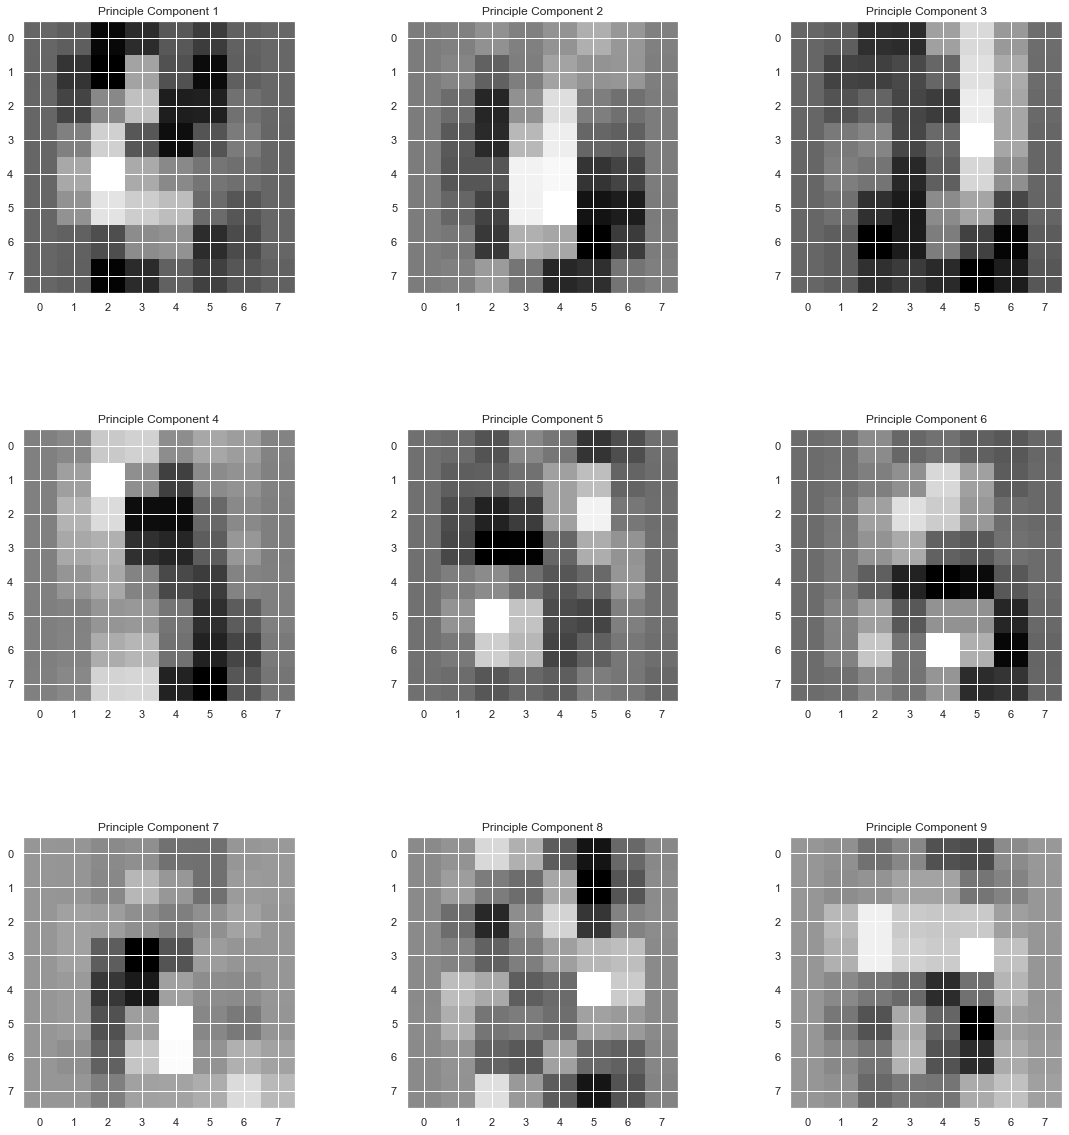

In [12]:
fig, axs = plt.subplots(3,3, figsize=(20, 20))
fig.subplots_adjust(hspace = .5, wspace=.1)
axs = axs.ravel()
for i in range(9):
    axs[i].imshow(pca.principle_components[:,i].reshape(8,8),cmap=plt.cm.gray)
    axs[i].set_title('Principle Component '+str(i+1))

Decomposition of the original data with PC:$$X = XVV^{T} = TV^{T}$$

Take the $i-th$ row, we have $$x_{i} = \sum_{j=1}^{p} t_{ij}v_{j}^{T}$$

[ 22.77232442  -4.9867192   10.74135463 -16.12670657  -4.38599242
   1.95434114   2.93956138  12.12780867   1.172011     7.47305536
   1.2496847    4.00597883  -3.92580275   5.01848625  -2.51919481] 4


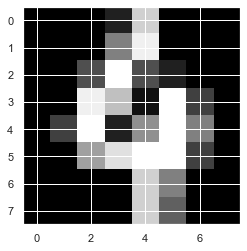

In [13]:
i = 100
plt.imshow(X[i,:].reshape(8,8),cmap=plt.cm.gray)
print(X_pca[i,:],y[i])

## Another Algorithm: Singular Value Decomposition (SVD)

The PCA in [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) is realized with SVD of data matrix, which sometimes can be  more stable numerically than covariance matrix-based approach.

Let $X\in \mathbb{R}^{n\times p}$ be the centered data matrix (each feature is of mean zero).

>Singular Value Decomposition (SVD): any real matrix can be decomposed into the following form:
>$$X = U S V^{\top}$$

Where $S\in \mathbb{R}^{n\times p}$ is a diagonal matrix whose diagonal entries are non-negative and in decreasing order. $U\in \mathbb{R}^{n\times n}$ and $V\in \mathbb{R}^{p\times p}$ are orthogonal matrices (i.e. columns of $V$ are orthogonal, same for $U$, $U^{\top}U = UU^{\top} = I$). 

The columns of $V= [\mathbf{v}_1 \mathbf{v}_2 \cdots \mathbf{v}_p]$ are are known as the right singular vectors. They are indeed the **principal components** (important directions).

The columns of $U = [\mathbf{u}_1 \mathbf{u}_2 \cdots \mathbf{u}_n]$ are known as the left singular vectors. 

**Relation with covariance-based approach:**
Since X is centered, we have covariance matrix $$\Sigma = \frac{1}{n-1}X^{\top}X=\frac{1}{n-1}V S^{\top}SV^{\top},$$

Note that $S^{\top}S$ is the diagonal matrix, therefore $V$ is the eigen-vector matrix of $\Sigma$ -- i.e. principle components. The first $k$ score (projection) matrix $T_{k}\in\mathbb{R}^{N\times k}$ of the data on first $k$-PCs are then calculated as $T_{k}=XV_{k}=U_{k}S_{k}$.

### Reference Reading Suggestions

- ISL: Chapter 10

- ESL: Chapter 14.5

- PML: Chapter 20.1